### Recopilación de datos

## Modelado Machine Learnin Prediccion de Demanda de taxis en la Ciudad de Nueva York

El modelado en desarrollo predecirá la demanda de taxis en la ciudad de nueva york, como resultado entregará el porcentaje de la demanda por los ususarios, asi los taxistas poder tener un mapa de zonas de alta demanda. La predicción trabaja bajo los parametros de 'borough', 'tipo de servicio', 'dia de la semana' y la 'hora que se desea tomar el taxi'.

Se tomó la decisión de solo tomar el dataset económico de taxis_2023.parquet que vienes como producto del scrapeo de la pagina web https://www.nyc.gov/site/tlc/index.page, esta decisión fue tomada bajo el análisis de cada datasets dentro de nuestro Data Werehouse después de haber realizado una Matriz de Correlación. 

### Importamos la libreria Pandas para realizar la visualizacion y cambios necesarios a nuestro dataset 

In [4]:
# importamos la libreria y leemos el archivo taxis_2023.parquet
import pandas as pd
taxis_NYC =pd.read_parquet('../0-DataSets/4-ModelosPrediccion/taxis_2023.parquet')
taxis_NYC

,RatecodeID,passenger_count,trip_distance,amount,service_type,pickup_borough,dropoff_borough,pickup_date,pickup_hour,dropoff_date,dropoff_hour
0,1.0,1,0.97,14.30,yellow,Manhattan,Manhattan,2023-01-01,0,2023-01-01,0
1,1.0,1,1.10,20.90,yellow,Manhattan,Manhattan,2023-01-01,0,2023-01-01,1
2,1.0,1,1.43,22.96,yellow,Manhattan,Manhattan,2023-01-01,0,2023-01-01,0
3,1.0,1,1.66,23.94,yellow,Manhattan,Manhattan,2023-01-01,0,2023-01-01,0
4,1.0,1,11.70,75.18,yellow,Manhattan,Bronx,2023-01-01,0,2023-01-01,0
...,...,...,...,...,...,...,...,...,...,...,...
7861599,1.0,1,0.58,8.30,green,Manhattan,Manhattan,2024-01-31,22,2024-01-31,22
7861600,1.0,1,2.18,26.25,green,Manhattan,Manhattan,2024-01-31,22,2024-01-31,22
7861601,1.0,2,1.12,9.70,green,Queens,Queens,2024-01-31,23,2024-01-31,23
7861602,1.0,1,4.59,39.97,green,Brooklyn,Manhattan,2024-01-31,23,2024-02-01,0


### ETL: 

Este proceso de realiza para poder tener un dataset mas limpio y prolijo de particularidades como datos atípicos, además de realizar la transformación de la forma mas adecuada para nuestro modelo de Machine Learning.


In [5]:
#Restringiendo parametros atipicos
taxis_NYC = taxis_NYC[taxis_NYC['trip_distance'] <= 100] # este filtro es por que existe datos de atipicos, mayores a 100 millas con un tiempo de desplazamiento de 3 minutos. 
taxis_NYC = taxis_NYC[taxis_NYC['amount'] >= 5] # este filtro es por que existe datos de atipicos, menores a 5 dolares y analizando solo es la propina sin haber havido desplazamiento de distancia. 
taxis_NYC = taxis_NYC[taxis_NYC['pickup_borough'] != 'EWR'] # este filtro es por que existe datos de atipicos, 'EWR' es un  aeropuerto pero esta lleno de errores en tiempos de deplazamiento. 

In [6]:
# Convertir la columna 'pickup_date' a tipo datetime y extraer año, mes y día
taxis_NYC['año'] = pd.to_datetime(taxis_NYC['pickup_date']).dt.year
taxis_NYC['mes'] = pd.to_datetime(taxis_NYC['pickup_date']).dt.month
taxis_NYC['dia'] = pd.to_datetime(taxis_NYC['pickup_date']).dt.day
taxis_NYC['dayofweek'] = pd.to_datetime(taxis_NYC['pickup_date']).dt.dayofweek

# Convertir la columna 'pickup_hour' a tipo datetime y extraer solo la hora
taxis_NYC['hora'] = taxis_NYC['pickup_hour']

#añadiendo ceros a la hora
taxis_NYC['hora'] = taxis_NYC['hora'].str.zfill(2) + ':00'

taxis_NYC

,RatecodeID,passenger_count,trip_distance,amount,service_type,pickup_borough,dropoff_borough,pickup_date,pickup_hour,dropoff_date,dropoff_hour,año,mes,dia,dayofweek,hora
0,1.0,1,0.97,14.30,yellow,Manhattan,Manhattan,2023-01-01,0,2023-01-01,0,2023,1,1,6,00:00
1,1.0,1,1.10,20.90,yellow,Manhattan,Manhattan,2023-01-01,0,2023-01-01,1,2023,1,1,6,00:00
2,1.0,1,1.43,22.96,yellow,Manhattan,Manhattan,2023-01-01,0,2023-01-01,0,2023,1,1,6,00:00
3,1.0,1,1.66,23.94,yellow,Manhattan,Manhattan,2023-01-01,0,2023-01-01,0,2023,1,1,6,00:00
4,1.0,1,11.70,75.18,yellow,Manhattan,Bronx,2023-01-01,0,2023-01-01,0,2023,1,1,6,00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7861599,1.0,1,0.58,8.30,green,Manhattan,Manhattan,2024-01-31,22,2024-01-31,22,2024,1,31,2,22:00
7861600,1.0,1,2.18,26.25,green,Manhattan,Manhattan,2024-01-31,22,2024-01-31,22,2024,1,31,2,22:00
7861601,1.0,2,1.12,9.70,green,Queens,Queens,2024-01-31,23,2024-01-31,23,2024,1,31,2,23:00
7861602,1.0,1,4.59,39.97,green,Brooklyn,Manhattan,2024-01-31,23,2024-02-01,0,2024,1,31,2,23:00


In [7]:
#Primero agrupamos por ciertas columnas para verificar si nos conviene o no los datos de la columna 'demand'

# Agrupa los datos en el DataFrame taxis_NYC por varias columnas y realiza agregaciones
# para calcular estadísticas como el número de pasajeros, la distancia promedio del viaje
# y el monto promedio del viaje para cada grupo definido por las columnas especificadas.
taxis_NYC = taxis_NYC.groupby(['service_type', 'pickup_borough', 'año', 'mes', 'dia', 'dayofweek', 'hora']).agg({'amount': 'mean'}).reset_index()

# Renombra las columnas del DataFrame resultante para hacerlas más descriptivas.
# Las nuevas columnas son 'service_type', 'pickup_borough', 'año', 'mes', 'dia', 'dayofweek', 'hora',
# 'demand' (número de pasajeros), 'total_millas_recorridas' (distancia promedio del viaje),
# y 'ganancia_hora' (monto promedio del viaje).
taxis_NYC.columns = ['service_type', 'pickup_borough', 'año', 'mes', 'dia', 'dayofweek', 'hora', 'amountt']

# Imprime el DataFrame resultante después de aplicar las transformaciones anteriores.
taxis_NYC


,service_type,pickup_borough,año,mes,dia,dayofweek,hora,amountt
0,green,Bronx,2023,1,1,6,01:00,53.75
1,green,Bronx,2023,1,1,6,12:00,11.50
2,green,Bronx,2023,1,1,6,18:00,15.00
3,green,Bronx,2023,1,1,6,20:00,9.00
4,green,Bronx,2023,1,2,0,09:00,25.90
...,...,...,...,...,...,...,...,...
58605,yellow,Staten Island,2024,1,26,4,12:00,108.94
58606,yellow,Staten Island,2024,1,27,5,19:00,19.08
58607,yellow,Staten Island,2024,1,28,6,12:00,27.00
58608,yellow,Staten Island,2024,1,29,0,08:00,5.20


In [10]:
#taxis_NYC.to_parquet('../modeloML/DataSetML.parquet')

### EDA

Se realiza un muestreo de los datos en graficas para tener contexto de lo que nos dicen los datos

In [8]:
#hacemos una doble copia por seguridad
conexion = taxis_NYC.copy()
DataSetEDA = conexion.copy()

In [9]:
# como la frecuencia es muy pequena, se hace una agrupacion de demanda por dias de la semana, fuera del año o mes, asi tendremos una demanda mas frecuente.

# Agrupa los datos en el DataFrame taxis_NYC por las columnas 'service_type', 'pickup_borough',
# 'dayofweek' y 'hora', y cuenta el número de registros en cada grupo.
DataSetEDA = DataSetEDA.groupby(['service_type', 'pickup_borough','año','mes', 'dia', 'dayofweek']).agg({'amountt': 'sum'}).reset_index()
DataSetEDA = DataSetEDA.groupby(['service_type', 'pickup_borough', 'dayofweek']).agg({'amountt': 'mean'}).reset_index()

# Convierte el resultado en un nuevo DataFrame, taxis_NYC.
DataSetEDA = pd.DataFrame(DataSetEDA)

# Devuelve el DataFrame resultante después de aplicar las transformaciones anteriores.
DataSetEDA

,service_type,pickup_borough,dayofweek,amountt
0,green,Bronx,0,71.029575
1,green,Bronx,1,84.200676
2,green,Bronx,2,101.101038
3,green,Bronx,3,96.593106
4,green,Bronx,4,110.922447
...,...,...,...,...
63,yellow,Staten Island,2,131.321974
64,yellow,Staten Island,3,128.287258
65,yellow,Staten Island,4,109.618065
66,yellow,Staten Island,5,145.749375


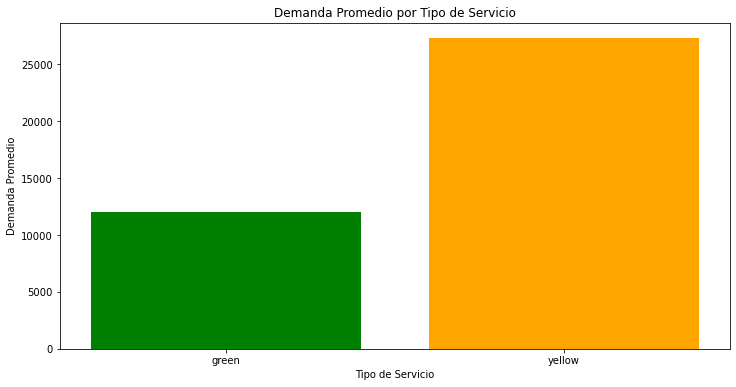

In [24]:
import matplotlib.pyplot as plt

# Suponiendo que tienes un DataFrame llamado 'taxis_NYC' con las columnas 'service_type' y 'demand'

# Agrupa los datos por tipo de servicio y calcula la demanda promedio para cada tipo
demand_por_servicio = DataSetEDA.groupby('service_type')['amountt'].sum()

# Obtiene los tipos de servicio y la demanda promedio
tipos_servicio = demand_por_servicio.index
demanda_promedio = demand_por_servicio.values

plt.figure(figsize=(12, 6))  # Ajusta el tamaño a 10 pulgadas de ancho y 6 pulgadas de alto

# Crea el gráfico de barras
plt.bar(tipos_servicio, demanda_promedio, color=['green','orange'])

# Agrega etiquetas y título al gráfico
plt.xlabel('Tipo de Servicio')
plt.ylabel('Ganancia Promedio')
plt.title('Ganancia Promedio por Tipo de Servicio')

# Muestra el gráfico
plt.show()


Esta grafica nos proporciona informacion de las ganancias segun tipo de servicio y vemos que los taxis amarillos tienen una mayor adquisicion y es devido al gran numero de taxis que existen sobre los verdes.

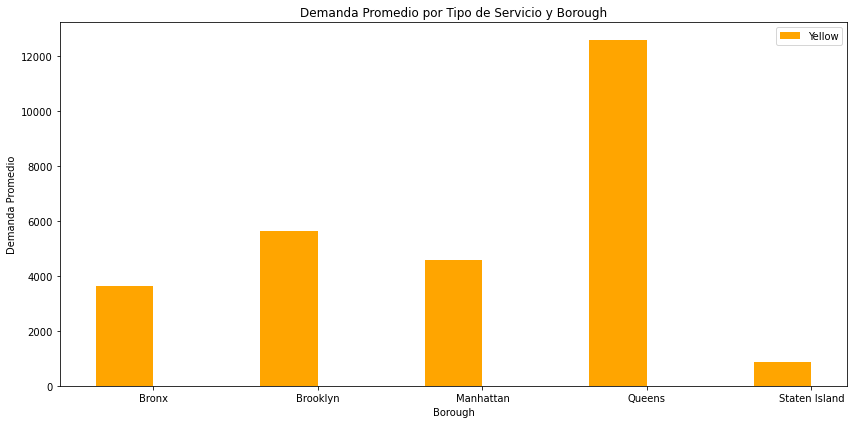

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Suponiendo que tienes un DataFrame llamado 'taxis_NYC' con las columnas 'service_type' y 'pickup_borough'

# Agrupa los datos por tipo de servicio y borough y calcula la demanda promedio para cada grupo
demand_por_tipo_y_borough = DataSetEDA.groupby(['service_type', 'pickup_borough'])['amountt'].sum().unstack()

# Obtiene los tipos de servicio y boroughs
tipos_servicio = demand_por_tipo_y_borough.index
boroughs = demand_por_tipo_y_borough.columns

# Configura las posiciones de las barras
posiciones = np.arange(len(boroughs))

# Ancho de las barras
ancho_barra = 0.35

# Ajusta el tamaño de la figura
plt.figure(figsize=(12, 6))  # Ajusta el tamaño a 10 pulgadas de ancho y 6 pulgadas de alto

# Crea el gráfico de barras agrupadas
plt.bar(posiciones - ancho_barra/2, demand_por_tipo_y_borough.loc['yellow'], width=ancho_barra, label='Yellow', color=['orange'])
#plt.bar(posiciones + ancho_barra/2, demand_por_tipo_y_borough.loc['green']*10, width=ancho_barra, label='Green', color=['green'])

# Configura las etiquetas de los ejes y el título
plt.xlabel('Borough')
plt.ylabel('Ganancia Promedio')
plt.title('Ganancia Promedio por Tipo de Servicio y Borough')
plt.xticks(posiciones, boroughs)  # Establece las etiquetas del eje x como los boroughs
plt.legend()  # Muestra la leyenda

# Muestra el gráfico
plt.tight_layout()  # Ajusta el diseño para que las etiquetas no se superpongan
plt.show()


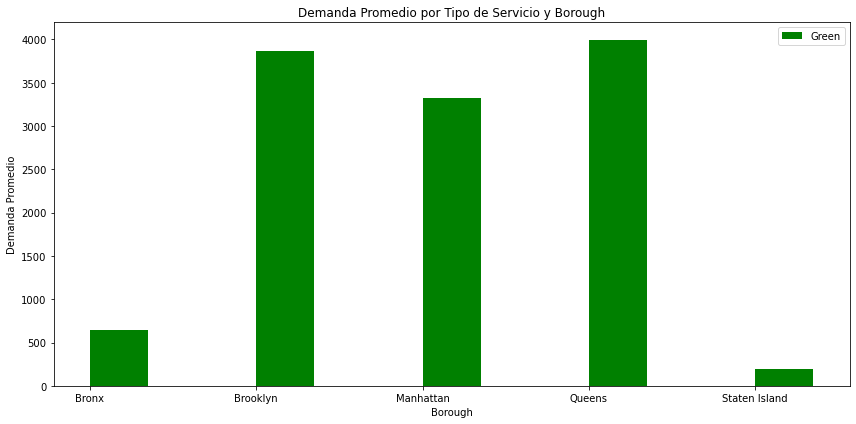

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Suponiendo que tienes un DataFrame llamado 'taxis_NYC' con las columnas 'service_type' y 'pickup_borough'

# Agrupa los datos por tipo de servicio y borough y calcula la demanda promedio para cada grupo
demand_por_tipo_y_borough = DataSetEDA.groupby(['service_type', 'pickup_borough'])['amountt'].sum().unstack()

# Obtiene los tipos de servicio y boroughs
tipos_servicio = demand_por_tipo_y_borough.index
boroughs = demand_por_tipo_y_borough.columns

# Configura las posiciones de las barras
posiciones = np.arange(len(boroughs))

# Ancho de las barras
ancho_barra = 0.35

# Ajusta el tamaño de la figura
plt.figure(figsize=(12, 6))  # Ajusta el tamaño a 10 pulgadas de ancho y 6 pulgadas de alto

# Crea el gráfico de barras agrupadas
#plt.bar(posiciones - ancho_barra/2, demand_por_tipo_y_borough.loc['yellow'], width=ancho_barra, label='Yellow', color=['orange'])
plt.bar(posiciones + ancho_barra/2, demand_por_tipo_y_borough.loc['green'], width=ancho_barra, label='Green', color=['green'])

# Configura las etiquetas de los ejes y el título
plt.xlabel('Borough')
plt.ylabel('Ganancia Promedio')
plt.title('Ganancia Promedio por Tipo de Servicio y Borough')
plt.xticks(posiciones, boroughs)  # Establece las etiquetas del eje x como los boroughs
plt.legend()  # Muestra la leyenda

# Muestra el gráfico
plt.tight_layout()  # Ajusta el diseño para que las etiquetas no se superpongan
plt.show()


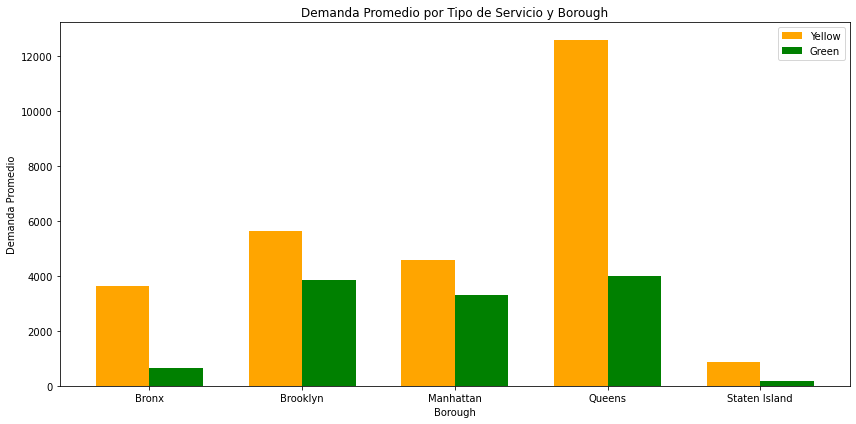

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Suponiendo que tienes un DataFrame llamado 'taxis_NYC' con las columnas 'service_type' y 'pickup_borough'

# Agrupa los datos por tipo de servicio y borough y calcula la demanda promedio para cada grupo
demand_por_tipo_y_borough = DataSetEDA.groupby(['service_type', 'pickup_borough'])['amountt'].sum().unstack()

# Obtiene los tipos de servicio y boroughs
tipos_servicio = demand_por_tipo_y_borough.index
boroughs = demand_por_tipo_y_borough.columns

# Configura las posiciones de las barras
posiciones = np.arange(len(boroughs))

# Ancho de las barras
ancho_barra = 0.35

# Ajusta el tamaño de la figura
plt.figure(figsize=(12, 6))  # Ajusta el tamaño a 10 pulgadas de ancho y 6 pulgadas de alto

# Crea el gráfico de barras agrupadas
plt.bar(posiciones - ancho_barra/2, demand_por_tipo_y_borough.loc['yellow'], width=ancho_barra, label='Yellow', color=['orange'])
plt.bar(posiciones + ancho_barra/2, demand_por_tipo_y_borough.loc['green'], width=ancho_barra, label='Green', color=['green'])

# Configura las etiquetas de los ejes y el título
plt.xlabel('Borough')
plt.ylabel('Ganancia Promedio')
plt.title('Ganancia Promedio por Tipo de Servicio y Borough')
plt.xticks(posiciones, boroughs)  # Establece las etiquetas del eje x como los boroughs
plt.legend()  # Muestra la leyenda

# Muestra el gráfico
plt.tight_layout()  # Ajusta el diseño para que las etiquetas no se superpongan
plt.show()


Esta grafica se analiza las ganancias por Distrito, se extrapola que la mayor demanda de taxis es en el Distrito de Manhattan pero donde mas se genera ganacias es en el distrito de Queens.

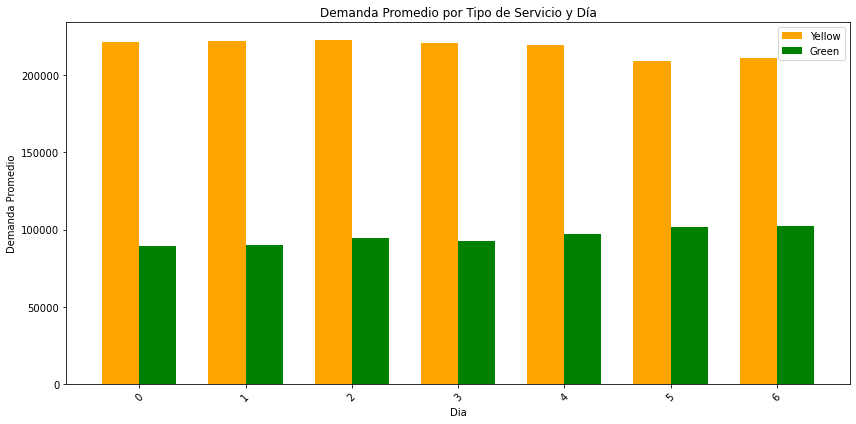

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Suponiendo que tienes un DataFrame llamado 'taxis_NYC' con las columnas 'service_type' y 'pickup_borough'

# Agrupa los datos por tipo de servicio y borough y calcula la demanda promedio para cada grupo
demand_por_tipo_y_borough = taxis_NYC.groupby(['service_type', 'dayofweek'])['amountt'].sum().unstack()

# Obtiene los tipos de servicio y boroughs
tipos_servicio = demand_por_tipo_y_borough.index
boroughs = demand_por_tipo_y_borough.columns

# Configura las posiciones de las barras
posiciones = np.arange(len(boroughs))

# Ancho de las barras
ancho_barra = 0.35

plt.figure(figsize=(12, 6))  # Ajusta el tamaño a 10 pulgadas de ancho y 6 pulgadas de alto

# Crea el gráfico de barras agrupadas
plt.bar(posiciones - ancho_barra/2, demand_por_tipo_y_borough.loc['yellow'], width=ancho_barra, label='Yellow', color=['orange'])
plt.bar(posiciones + ancho_barra/2, demand_por_tipo_y_borough.loc['green'], width=ancho_barra, label='Green', color=['green'])

# Configura las etiquetas de los ejes y el título
plt.xlabel('Dia')
plt.ylabel('Ganancia Promedio')
plt.title('Ganancia Promedio por Tipo de Servicio y Día')
plt.xticks(posiciones, boroughs)  # Establece las etiquetas del eje x como los boroughs
plt.legend()  # Muestra la leyenda
plt.xticks(rotation=45)
# Muestra el gráfico
plt.tight_layout()  # Ajusta el diseño para que las etiquetas no se superpongan
plt.show()


Analizando este grafico notamos que todos los dias es casi la misma tendencia de ganancia, pero los dias de semana L-V hay un poco mas de ganancia.

## Modelamiento de Machine Learning

### Se cambiaran ciertos parametros adecuando a nuestro modelo de prediccion de ganancia

In [39]:
#hacemos una copia de nuestro DF taxis_NYC.parquet en DataSetML
conexion = taxis_NYC.copy()
DataSetML = conexion.copy()

In [40]:
taxis_NYC

,service_type,pickup_borough,año,mes,dia,dayofweek,hora,amountt
0,green,Bronx,2023,1,1,6,01:00,53.75
1,green,Bronx,2023,1,1,6,12:00,11.50
2,green,Bronx,2023,1,1,6,18:00,15.00
3,green,Bronx,2023,1,1,6,20:00,9.00
4,green,Bronx,2023,1,2,0,09:00,25.90
...,...,...,...,...,...,...,...,...
58605,yellow,Staten Island,2024,1,26,4,12:00,108.94
58606,yellow,Staten Island,2024,1,27,5,19:00,19.08
58607,yellow,Staten Island,2024,1,28,6,12:00,27.00
58608,yellow,Staten Island,2024,1,29,0,08:00,5.20


In [41]:

# como la frecuencia es muy pequena, se hace una agrupacion de demanda por dias de la semana, fuera del año o mes, asi tendremos una demanda mas frecuente.

# Agrupa los datos en el DataFrame taxis_NYC por las columnas 'service_type', 'pickup_borough',
# 'dayofweek' y 'hora', y cuenta el número de registros en cada grupo.
DataSetML = DataSetML.groupby(['service_type', 'pickup_borough','año','mes', 'dia', 'dayofweek']).agg({'amountt': 'sum'}).reset_index()#sumamos los promedios de las horas 24 horas y lo dejamos por dia
DataSetML = DataSetML.groupby(['service_type', 'pickup_borough', 'dayofweek']).agg({'amountt': 'mean'}).reset_index()# aqui agrupamos mas los datos y tomamos los promedios de cada dia de lunes a viernes en todo el año

# Convierte el resultado en un nuevo DataFrame, taxis_NYC.
DataSetML = pd.DataFrame(DataSetML)

# Devuelve el DataFrame resultante después de aplicar las transformaciones anteriores.
DataSetML

,service_type,pickup_borough,dayofweek,amountt
0,green,Bronx,0,71.029575
1,green,Bronx,1,84.200676
2,green,Bronx,2,101.101038
3,green,Bronx,3,96.593106
4,green,Bronx,4,110.922447
...,...,...,...,...
63,yellow,Staten Island,2,131.321974
64,yellow,Staten Island,3,128.287258
65,yellow,Staten Island,4,109.618065
66,yellow,Staten Island,5,145.749375


In [130]:
DataSetML.amountt.value_counts()

amountt
71.029575     1
816.949181    1
653.690998    1
654.529416    1
659.554452    1
             ..
22.470000     1
35.490000     1
57.353333     1
49.200000     1
132.063514    1
Name: count, Length: 68, dtype: int64

In [131]:
# Mapea los valores de la columna 'service_type' a valores numéricos.
DataSetML['serviceID'] = DataSetML['service_type'].map({'yellow': 1, 'green': 0})

# Mapea los valores de la columna 'pickup_borough' a valores numéricos.
DataSetML['borough2ID'] = DataSetML['pickup_borough'].map({'Manhattan': 1, 'Queens': 2, 'Brooklyn': 3, 'Bronx': 4, 'Staten Island': 5})

# Devuelve el DataFrame resultante con las columnas 'serviceID' y 'borough2ID' añadidas.
DataSetML


,service_type,pickup_borough,dayofweek,amountt,serviceID,borough2ID
0,green,Bronx,0,71.029575,0,4
1,green,Bronx,1,84.200676,0,4
2,green,Bronx,2,101.101038,0,4
3,green,Bronx,3,96.593106,0,4
4,green,Bronx,4,110.922447,0,4
...,...,...,...,...,...,...
63,yellow,Staten Island,2,131.321974,1,5
64,yellow,Staten Island,3,128.287258,1,5
65,yellow,Staten Island,4,109.618065,1,5
66,yellow,Staten Island,5,145.749375,1,5


In [132]:
#eliminando las columnas que tienes strings
DataSetML = DataSetML.drop(columns={'service_type','pickup_borough'})
DataSetML

,dayofweek,amountt,serviceID,borough2ID
0,0,71.029575,0,4
1,1,84.200676,0,4
2,2,101.101038,0,4
3,3,96.593106,0,4
4,4,110.922447,0,4
...,...,...,...,...
63,2,131.321974,1,5
64,3,128.287258,1,5
65,4,109.618065,1,5
66,5,145.749375,1,5


In [133]:
Modeladoganancia = DataSetML.copy()

### Entrenamiento del Modelo

In [134]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

#ModeladoDemanda['hora'] = pd.to_datetime(ModeladoDemanda['hora'], format='%H:%M').dt.hour

df = Modeladoganancia
# Separación de características y variable objetivo
X = df.drop(['amountt'], axis=1)
y = df['amountt']

# Dividimos los datos en conjuntos de entrenamiento 70% y prueba 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=65)#65=0.9853196519149915:15=0.9850329496606642

# Dividimos los datos de testeo en dos conjuntos: unos el de testeto 50%=15%T y Validacion 50%=15%T
X_test, X_validation, y_test, y_validation = train_test_split(X_test, y_test, test_size=0.5, random_state=65)

# Inicializamos y entrenamos el modelo RandomForestRegressor con parámetros ajustados
model_taxi = RandomForestRegressor(random_state=10)      # Semilla para reproducibilidad

# Entrenamiento de modelos
model_taxi.fit(X_train, y_train)



RandomForestRegressor(random_state=10)

### Testeo del Modelo

In [135]:
# Evaluación de modelos
y_pred = model_taxi.predict(X_test)

mse_taxi = mean_squared_error(y_test, y_pred)
r2_taxi = r2_score(y_test, y_pred)
mae_taxi = mean_absolute_error(y_test, y_pred)
rmse_taxi = np.sqrt(mean_squared_error(y_test, y_pred))
print("MSE para taxi :", mse_taxi)
print("R-squared (R2) para taxi :", r2_taxi)
print("Mean Absolute Error (MAE) para taxi :", mae_taxi)
print("Root Mean Squared Error (RMSE) para taxi :", rmse_taxi)


# Paso 3: Mejora de los taxis verdes
# Analizar características importantes
feature_importances = pd.DataFrame(model_taxi.feature_importances_,
                                   index=X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)

MSE para taxi : 6114.564934824128
R-squared (R2) para taxi : 0.9815771550990424
Mean Absolute Error (MAE) para taxi : 61.737655716816235
Root Mean Squared Error (RMSE) para taxi : 78.19568360737136
            importance
borough2ID    0.746716
serviceID     0.217335
dayofweek     0.035948


### Mejoramiento del modelo

In [136]:
param_grid = {'n_estimators':[50,150,250], # Número de árboles en el bosque
              'max_depth':[5,15,25],       # Profundidad máxima de los árboles
              'min_samples_split':[2,4,6], # Número mínimo de muestras requeridas para dividir un nodo interno
              'min_samples_leaf':[1,2,3]}   # Número mínimo de muestras requeridas para ser un nodo hoja

In [137]:
from sklearn.model_selection import GridSearchCV

# Definir y configurar GridSearchCV
model_taxi_cv = GridSearchCV(estimator=model_taxi, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')
model_taxi_cv.fit(X_train, y_train)  # Entrenar el modelo y buscar los mejores hiperparámetros

# Evaluación de modelos
y_pred = model_taxi_cv.predict(X_test)  # Realizar predicciones en el conjunto de prueba

# Calcular métricas de evaluación
mse_taxi = mean_squared_error(y_test, y_pred)  # Calcular el error cuadrático medio
r2_taxi = r2_score(y_test, y_pred)  # Calcular el coeficiente de determinación (R^2)
mae_taxi = mean_absolute_error(y_test, y_pred)  # Calcular el error absoluto medio
rmse_taxi = np.sqrt(mean_squared_error(y_test, y_pred))  # Calcular la raíz del error cuadrático medio

# Imprimir resultados de evaluación
print("MSE para taxi :", mse_taxi)
print("R-squared (R2) para taxi :", r2_taxi)
print("Mean Absolute Error (MAE) para taxi :", mae_taxi)
print("Root Mean Squared Error (RMSE) para taxi :", rmse_taxi)


MSE para taxi : 3103.167731197496
R-squared (R2) para taxi : 0.9906503277955372
Mean Absolute Error (MAE) para taxi : 41.91904461774078
Root Mean Squared Error (RMSE) para taxi : 55.706083430784254


### Guardamos el Modelo en formato .pkl

In [138]:
import joblib
# Guardamos el modelo en un archivo pickle
joblib.dump(model_taxi, '../0-DataSets/4-ModelosPrediccion/model_taxi_eco.pkl')
joblib.dump(model_taxi_cv, '../0-DataSets/4-ModelosPrediccion/model_taxi_eco_cv.pkl')

['model_taxi_eco_cv.pkl']

### Prueba del modelo con datos creados

Vemos el formato de la estructura de dataframe de ingreso al modelo

In [139]:
df = DataSetML
# Separación de características y variable objetivo
X = df.drop(['amountt'], axis=1)
X.head(1)

,dayofweek,serviceID,borough2ID
0,0,0,4


Preparando datos creados

In [3]:
# Suponiendo que tienes algunos datos para hacer predicciones
nuevos_datos = {
    'dayofweek': [0, 1, 1],  # Ejemplo de valores de día #'hora': ['17:00', '2:00', '21:00'],  # Ejemplo de valores de hora
    'serviceID': [0, 1, 0],  # Ejemplo de valores de service_type2
    'borough2ID': ['4', '5', '2']  # Ejemplo de valores de pickup_borough2
} #dia	hora	total_millas_recorridas	ganancia_hora	service_type2	pickup_borough2

# Crear DataFrame de nuevos datos
X_nuevos_datos = pd.DataFrame(nuevos_datos)
#X_nuevos_datos['hora'] = pd.to_datetime(X_nuevos_datos['hora'], format='%H:%M').dt.hour

# Imprimir los nuevos datos
print("Nuevos datos para hacer predicciones:")
X_nuevos_datos
#dayofweek	hora	serviceID	borough2ID

Nuevos datos para hacer predicciones:


,dayofweek,serviceID,borough2ID
0,0,0,4
1,1,1,5
2,1,0,2


Prediciendo la demanda de los datos creados

In [141]:
# Cargar el modelo desde el archivo pickle
loaded_model = joblib.load('../0-DataSets/4-ModelosPrediccion/model_taxi_eco_cv.pkl')

# Suponiendo que tienes nuevos datos en X_nuevos_datos
# Hacer predicciones con el modelo cargado
y_pred_ml = loaded_model.predict(X_nuevos_datos)

# Imprimir las predicciones
print("Predicciones del modelo cargado:", y_pred_ml)


Predicciones del modelo cargado: [ 78.49188271 110.87872413 553.82545788]


c:\Users\Pc\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning:

The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- dia
- pickup_borough2
- service_type2
Feature names seen at fit time, yet now missing:
- borough2ID
- dayofweek
- serviceID




### Graficando el proceso de entrenamiendo y testeo del Modelo

In [142]:
from sklearn.model_selection import learning_curve
import plotly.graph_objects as go

# Calculamos la curva de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(model_taxi, X_train, y_train, cv=5)

# Calculamos los promedios de los puntajes de entrenamiento y validación cruzada
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Creamos un objeto figura de Plotly
fig = go.Figure()

# Añadimos la curva de aprendizaje del puntaje de entrenamiento
fig.add_trace(go.Scatter(x=train_sizes, y=train_scores_mean, mode='lines', name='Training Score'))

# Añadimos la curva de aprendizaje del puntaje de validación cruzada
fig.add_trace(go.Scatter(x=train_sizes, y=test_scores_mean, mode='lines', name='Cross-validation Score'))

# Actualizamos el diseño del gráfico
fig.update_layout(
    title='Curva de Aprendizaje',
    xaxis_title='Training examples',
    yaxis_title='Score',
    legend=dict(x=0, y=1, traceorder='normal', orientation='h'),
)

# Mostramos el gráfico
fig.show()


In [143]:
import plotly.express as px

# Creamos un DataFrame con los valores reales y las predicciones
df = pd.DataFrame({'Valor Real': y_test, 'Predicciones': y_pred})

# Creamos un histograma utilizando Plotly Express
fig = px.histogram(df, nbins=30, marginal='rug', labels={'value': 'Valor'},
                   title='Distribución de Predicciones y Valores Reales',
                   category_orders={'variable': ['Valor Real', 'Predicciones']},
                   color_discrete_sequence=['blue', 'orange'],
                   barmode='overlay')

# Actualizamos el diseño del gráfico
fig.update_layout(
    xaxis_title='Valor',
    yaxis_title='Frecuencia',
)

# Mostramos el gráfico
fig.show()


In [144]:
# Creamos un DataFrame con las predicciones y valores reales
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Ordenamos el DataFrame por los valores reales para una mejor visualización
results_df = results_df.sort_values(by='Actual')

# Creamos gráfico de dispersión con Plotly Express
fig = px.scatter(results_df, x=results_df.index, y=['Actual', 'Predicted'],
                 labels={'value': 'Valor'},
                 title='Predicciones vs. Valores Reales',
                 color_discrete_sequence=['red', 'blue'])

# Configuramos el diseño del gráfico
fig.update_layout(
    xaxis_title='Índice',
    yaxis_title='Valor',
)

# Mostramos el gráfico
fig.show()

In [145]:
# Creamos un DataFrame para Plotly Express
df = pd.DataFrame({'Tipo': ['Valores Reales'] * len(y_test) + ['Predicciones'] * len(y_pred),
                   'Valor': list(y_test) + list(y_pred)})

# Creamos gráfico de violín con Plotly Express
fig = px.violin(df, x='Tipo', y='Valor', box=True, points="all", color='Tipo',
                labels={'Tipo': 'Tipo', 'Valor': 'Valor'},
                category_orders={'Tipo': ['Valores Reales', 'Predicciones']},
                violinmode='overlay')

# Configuramos el diseño del gráfico
fig.update_layout(
    title='Distribución de Predicciones y Valores Reales',
    xaxis_title='Tipo',
    yaxis_title='Valor',
    legend=dict(x=0.8, y=0.95),
)

# Mostramos el gráfico
fig.show()

### Validacion del Modelo

In [146]:
# Cargar el modelo desde el archivo pickle
loaded_model = joblib.load('../0-DataSets/4-ModelosPrediccion/model_taxi_eco_cv.pkl')

# Suponiendo que tienes nuevos datos en X_nuevos_datos
# Hacer predicciones con el modelo cargado
y_pred_validacion = loaded_model.predict(X_validation)

# Imprimir las predicciones
print(X_validation)
print("Predicciones del modelo cargado:", y_pred_validacion)


    dayofweek  serviceID  borough2ID
48          1          1           1
23          2          0           2
31          4          0           5
61          0          1           5
17          3          0           1
25          4          0           2
13          6          0           3
14          0          0           1
18          4          0           1
58          4          1           2
41          1          1           3
Predicciones del modelo cargado: [ 707.20773312  528.16625082   57.14677472  119.39305388  483.64236616
  547.4675552   625.96233136  507.17468683  480.30030867 1705.11469548
  803.99662499]


In [153]:
# Calculamos el error cuadrático medio (MSE) entre los valores reales y las predicciones
mse_taxi = mean_squared_error(y_validation, y_pred_validacion)

# Calculamos el coeficiente de determinación (R^2) entre los valores reales y las predicciones
r2_taxi = r2_score(y_validation, y_pred_validacion)

# Calculamos el error absoluto medio (MAE) entre los valores reales y las predicciones
mae_taxi = mean_absolute_error(y_validation, y_pred_validacion)

# Calculamos la raíz cuadrada del error cuadrático medio (RMSE) entre los valores reales y las predicciones
rmse_taxi = np.sqrt(mean_squared_error(y_validation, y_pred_validacion))

# Imprimimos los resultados de las métricas de evaluación
print("MSE para taxi:", mse_taxi)
print("R-squared (R2) para taxi:", r2_taxi)
print("Mean Absolute Error (MAE) para taxi:", mae_taxi)
print("Root Mean Squared Error (RMSE) para taxi:", rmse_taxi)


MSE para taxi : 2600.3371507002557
R-squared (R2) para taxi : 0.9867755503266646
Mean Absolute Error (MAE) para taxi : 33.71892266889013
Root Mean Squared Error (RMSE) para taxi : 50.993501063373316


In [154]:
# Creamos un DataFrame con las predicciones y valores reales
results_df = pd.DataFrame({'Actual': y_validation, 'Predicted': y_pred_validacion})

# Ordenamos el DataFrame por los valores reales para una mejor visualización
results_df = results_df.sort_values(by='Actual')

# Creamos gráfico de dispersión con Plotly Express
fig = px.scatter(results_df, x=results_df.index, y=['Actual', 'Predicted'],
                 labels={'value': 'Valor'},
                 title='Predicciones vs. Valores Reales',
                 color_discrete_sequence=['red', 'blue'])

# Configuramos el diseño del gráfico
fig.update_layout(
    xaxis_title='Índice',
    yaxis_title='Valor',
)

# Mostramos el gráfico
fig.show()